In [2]:
import torch
import numpy

import matplotlib.pyplot as plt

plt.style.use('default')

'''
algorithm:
    0: 加权蒸馏 0.880
    1: 逐个蒸馏 0.850
    2: 服务器交换参数 0.825
    3: 服务器单独训练, 不使用公开数据 0.881
    4: 服务器单独训练，使用公开数据 0.872
model:
    1: CNN
    2: LeNet5
    3: ResNet18
'''
'''
alpha = 0.1, 0.3, 0.5, 0.7, 0.9
T = 2, 4, 6, 8
'''

data = {}
T = [2, 4, 6, 8]
for i, T_ in enumerate(T):
    file_path = f'./res/mnist_model_1_algo_2/alpha_0.1_T_{T_}/server_commu_50_client_commu_5_client_train_5_batch_size_160_num_all_client_9_num_all_server_3_num_client_data_1200_num_public_data_50_proportion_0.8.pt'
    data[i] = torch.load(file_path, map_location='cpu')

legends = {0: 2, 1: 4, 2: 6, 3: 8}

print(data.keys())

dict_keys([0, 1, 2, 3])


0.83437184492747 [0.0995979905128479, 0.0995979905128479, 0.2304857571919759, 0.5192964772383373, 0.6652261217435201, 0.6964824199676514, 0.7159463763237, 0.7288777033487955, 0.7497487266858419, 0.7622110446294149, 0.7726633151372273, 0.7770184278488159, 0.7835175792376199, 0.786030133565267, 0.7930318117141724, 0.7927638093630474, 0.7989279627799988, 0.8015410304069519, 0.8008710145950317, 0.8051926294962566, 0.8059966365496317, 0.8106867671012878, 0.8113902807235718, 0.8157118956247966, 0.8139363527297974, 0.8150418599446614, 0.8164154092470804, 0.8188944458961487, 0.8183919390042622, 0.8207705219586692, 0.8232830762863159, 0.8245225946108499, 0.8242210944493611, 0.8242211143175759, 0.824254592259725, 0.8273031910260518, 0.826331655184428, 0.828810731569926, 0.8272026777267456, 0.8283082048098247, 0.8290117383003235, 0.8281071782112122, 0.8297487298647563, 0.8299497365951538, 0.832127292950948, 0.8323953151702881, 0.8342378338177998, 0.8334003289540608, 0.8333333333333333, 0.83437184

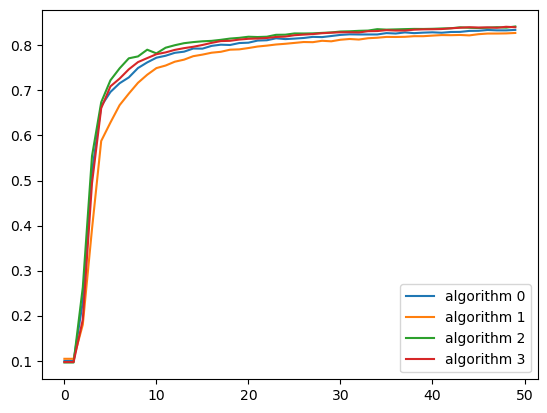

In [22]:
server_acc_mean = {}
num_line = len(data[0]['server_acc'][0])
for i, T_ in enumerate(T):
    server_acc_mean[i] = numpy.zeros(num_line).tolist()
    for server in [0, 1, 2]:
        server_acc = data[i]['server_acc']
        server_acc_mean[i] += (numpy.array(server_acc[server]) / numpy.array(len(data[server]['server_acc'])))
end_point = 50
x = numpy.arange(num_line)[:end_point]
for i, T_ in enumerate(T):
    y = server_acc_mean[i][:end_point]
    plt.plot(x, y, label=legends[i])
    print(y[-1], list(y))
plt.legend()
plt.show()